# Discrete Fourier Transform

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def gaussian(x, y, x0, t):
    # Green's function for the diffusion equation
    dx = x-x0[0]
    dy = y-x0[1]
    return np.exp(-(dx**2 + dy**2)/(4*t)) / (4*np.pi*t)

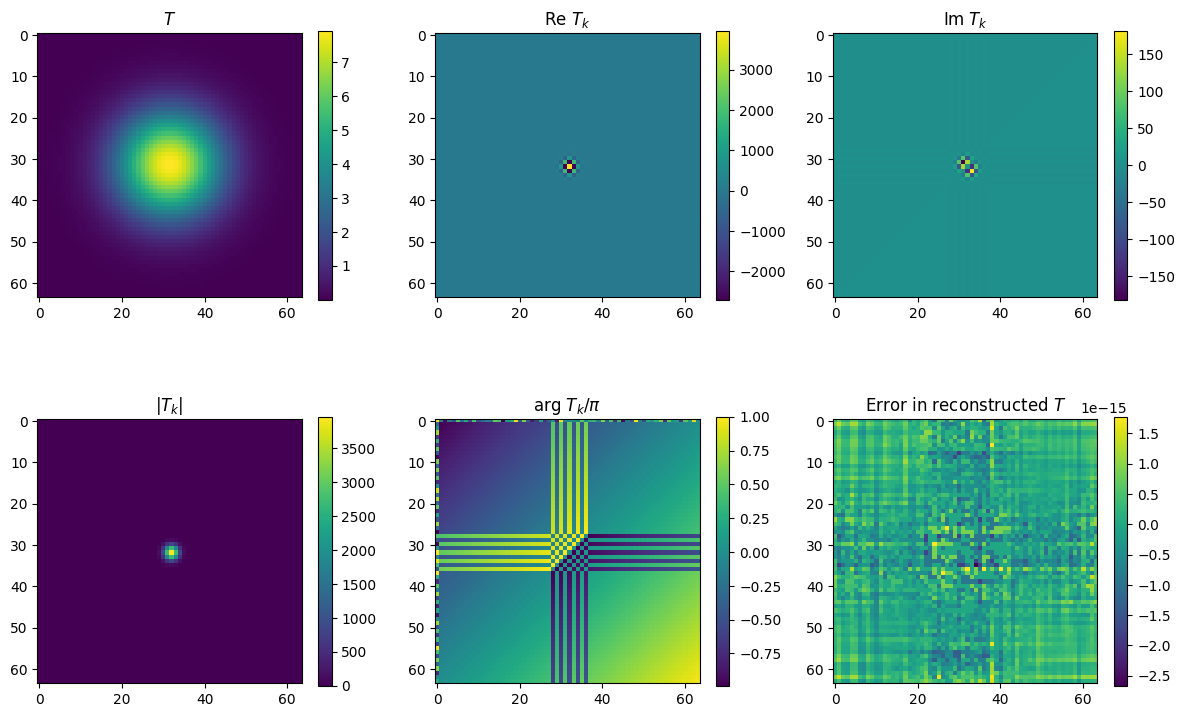

In [3]:
# set up the grid and initial condition
# we set T to be the Green's function corresponding to time t0
# Use a fairly small grid so we can see what's happening with the FFTs
n = 64
T = np.zeros((n,n))
x = np.linspace(0,1,n)
dx = x[1]-x[0]
xx, yy = np.meshgrid(x, x)
x0 = (0.5,0.5)
t0 = 0.01 # initial time
T = gaussian(xx, yy, x0, t0)

# Find the 2D FFT of the temperature field
Tk = np.fft.fft2(T)
# shifted version with k=0 at the center
Tkshift = np.fft.fftshift(Tk)

# Plot the FFT
fig = plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(T)
plt.title(r'$T$')
shrink = 0.7
plt.colorbar(shrink=shrink)

plt.subplot(232)
plt.imshow(np.real(Tkshift))
plt.title(r'Re $T_k$')
plt.colorbar(shrink=shrink)

plt.subplot(233)
plt.imshow(np.imag(Tkshift))
plt.title(r'Im $T_k$')
plt.colorbar(shrink=shrink)

plt.subplot(234)
plt.imshow(np.absolute(Tkshift))
plt.title(r'$|T_k|$')
plt.colorbar(shrink=shrink)

plt.subplot(235)
plt.imshow(np.angle(Tkshift)/np.pi)
plt.title(r'arg $T_k/\pi$')
plt.colorbar(shrink=shrink)

plt.subplot(236)
T2 = np.fft.ifft2(Tkshift)
plt.imshow(np.absolute(T2)-T)
plt.title(r'Error in reconstructed $T$')
plt.colorbar(shrink=shrink)

plt.tight_layout()
plt.show()

In [9]:
# Have a look at the k vectors
kx = np.fft.fftfreq(n)
ky = np.fft.fftfreq(n)
kxx, kyy = np.meshgrid(kx, ky)

print(np.shape(kx))
print(kx)
print(1/n, 2/n, 3/n)

(64,)
[ 0.        0.015625  0.03125   0.046875  0.0625    0.078125  0.09375
  0.109375  0.125     0.140625  0.15625   0.171875  0.1875    0.203125
  0.21875   0.234375  0.25      0.265625  0.28125   0.296875  0.3125
  0.328125  0.34375   0.359375  0.375     0.390625  0.40625   0.421875
  0.4375    0.453125  0.46875   0.484375 -0.5      -0.484375 -0.46875
 -0.453125 -0.4375   -0.421875 -0.40625  -0.390625 -0.375    -0.359375
 -0.34375  -0.328125 -0.3125   -0.296875 -0.28125  -0.265625 -0.25
 -0.234375 -0.21875  -0.203125 -0.1875   -0.171875 -0.15625  -0.140625
 -0.125    -0.109375 -0.09375  -0.078125 -0.0625   -0.046875 -0.03125
 -0.015625]
0.015625 0.03125 0.046875


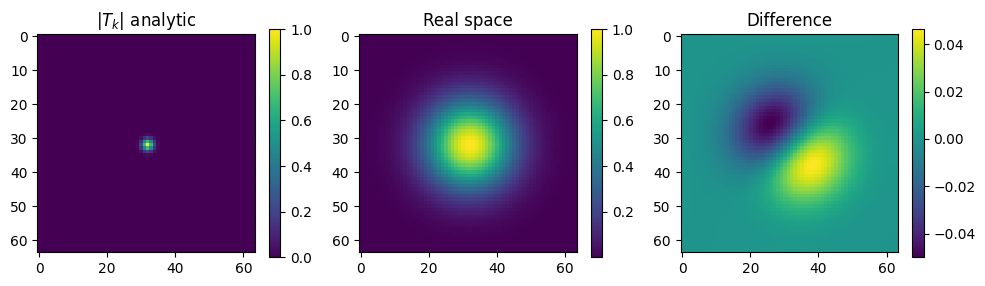

In [5]:
# Now construct the delta function at t=0 (flat in k-space)
# and evolve it to t0
Tkanal = np.ones((n,n))
tevol = np.exp(-4*np.pi**2 * (kxx**2 + kyy**2)*t0/dx**2)
Tkanal = Tkanal * tevol

fig = plt.figure(figsize=(10,6))

plt.subplot(131)
plt.imshow(np.absolute(np.fft.fftshift(Tkanal)))
plt.title(r'$|T_k|$ analytic')
shrink = 0.4
plt.colorbar(shrink=shrink)

plt.subplot(132)
T2 = np.fft.ifft2(Tkanal)
T2 = np.roll(T2, n//2, axis=0)
T2 = np.roll(T2, n//2, axis=1)
plt.imshow(np.abs(T2)/np.max(np.abs(T2)))
plt.title(r'Real space')
plt.colorbar(shrink=shrink)

plt.subplot(133)
T2 = np.fft.ifft2(Tkanal)
T2 = np.roll(T2, n//2, axis=0)
T2 = np.roll(T2, n//2, axis=1)
T2max = np.max(np.abs(T2))
plt.title(r'Difference')
plt.imshow(np.abs(T2)/T2max-T/np.max(T))
plt.colorbar(shrink=shrink)

plt.tight_layout()
plt.show()

Notes:

- the DFT is returned as an array of complex variables (see [numpy datatypes](https://numpy.org/doc/stable/user/basics.types.html)). Useful functions are [numpy.real](https://numpy.org/doc/stable/reference/generated/numpy.real.html), [numpy.imag](https://numpy.org/doc/stable/reference/generated/numpy.imag.html), [numpy.angle](https://numpy.org/doc/stable/reference/generated/numpy.angle.html), and [numpy.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html#numpy.absolute) to get the real and imaginary parts, the argument and absolute value/modulus of the complex number
- the ordering of the $k$ vectors is $k=0$ first, then the positive $k$ vectors from small to large, followed by the negative $k$ vectors from most negative back up towards $k=0$. For plotting above, we used [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) to shift the $k=0$ mode into the centre.
- the values of $k$ ordered from most negative to most positive are

$$-{1\over 2}, -{1\over 2}+{1\over N}, \dots, 0, {1\over N}, {2\over N}, \dots, {1\over 2}-{1\over N}$$

where $N$ is the number of grid points.
